In this exercise, you'll predict house prices using your model. To complete this assessment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

Load the houseprices data from Thinkful's database.
Split your data into train and test sets.
Estimate your model from the previous lesson in the training set. Assess the goodness of fit of your model.
Predict the house prices in the test set, and evaluate the performance of your model using the metrics previously mentioned in this lesson.
Is the performance of your model satisfactory? Why or why not?
Try to improve your model in terms of predictive performance by adding or removing some variables.
Submit a link to your Notebook at the end of this assessment, after you answer a few questions related to your model.

In [6]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sqlalchemy import create_engine, text

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
#insurance_df = pd.read_sql_query('select * from medicalcosts',con=engine)

house_prices_df = pd.DataFrame(engine.connect().execute(text('select * from houseprices')))

# No need for an open connection, because you're only doing a single query
engine.dispose()

house_prices_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [4]:
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True).columns)

In [13]:
from sklearn.model_selection import train_test_split
# Y is the target variable
Y = house_prices_df['saleprice']
# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'mszoning_FV', 'mszoning_RL'] + dummy_column_names]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))



The number of observations in training set is 1168
The number of observations in test set is 292


In [14]:
X_train.head()

,overallqual,grlivarea,garagecars,totalbsmtsf,mszoning_FV,mszoning_RL,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave
151,5,969,2,969,0,1,0,0,1,0,1
262,8,2574,3,1482,0,1,0,0,1,0,1
1037,8,2263,2,1055,0,1,0,0,1,0,1
1183,5,1130,2,1120,0,1,0,0,1,0,1
933,7,1500,2,1500,0,1,0,0,1,0,1


In [15]:
X_train = sm.add_constant(X_train)

# Fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# Print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     424.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:38:28   Log-Likelihood:                -13973.
No. Observations:                1168   AIC:                         2.797e+04
Df Residuals:                    1158   BIC:                         2.802e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.005e+05   2.05e+04     -4.900      

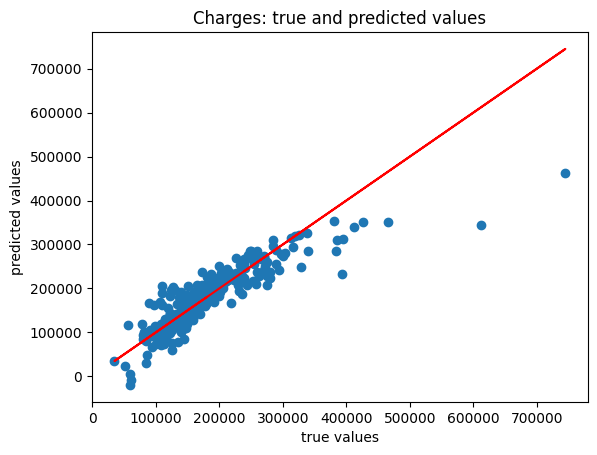

Mean absolute error of the prediction is: 25698.40029906949
Mean squared error of the prediction is: 1560222128.7468936
Root mean squared error of the prediction is: 39499.64719775221
Mean absolute percentage error of the prediction is: 15.66123355697912


In [18]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
# Add a constant to the model because it's best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# You are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



**Try to improve your model in terms of predictive performance by adding or removing some variables**

In [25]:
from sklearn.model_selection import train_test_split

house_prices_df['totalsf'] = house_prices_df['totalbsmtsf'] + house_prices_df['firstflrsf'] + house_prices_df['secondflrsf']

house_prices_df['int_over_sf'] = house_prices_df['totalsf'] * house_prices_df['overallqual']

# Y is the target variable
Y1 = np.log1p(house_prices_df['saleprice'])
# X is the feature set
X1 = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalsf', 'int_over_sf'] + dummy_column_names]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X1_train.shape[0]))
print("The number of observations in test set is {}".format(X1_test.shape[0]))



The number of observations in training set is 1168
The number of observations in test set is 292


In [26]:
X1_train.head()

,overallqual,grlivarea,garagecars,garagearea,totalsf,int_over_sf,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave
151,5,969,2,440,1938,9690,0,0,1,0,1
262,8,2574,3,868,4056,32448,0,0,1,0,1
1037,8,2263,2,905,3318,26544,0,0,1,0,1
1183,5,1130,2,720,2250,11250,0,0,1,0,1
933,7,1500,2,570,3000,21000,0,0,1,0,1


In [27]:
X1_train = sm.add_constant(X1_train)

# Fit an OLS model using statsmodels
results = sm.OLS(y1_train, X1_train).fit()

# Print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     520.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:44:31   Log-Likelihood:                 463.99
No. Observations:                1168   AIC:                            -904.0
Df Residuals:                    1156   BIC:                            -843.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.9162      0.102     97.518      

This second model's R-squared and adjusted R-squared values are higher and AIC and BIC criterias are lower than the first model. In any case, these indicate that the second model has a better goodness of fit than the first model. Now, let's evaluate the test set performance of this second model:

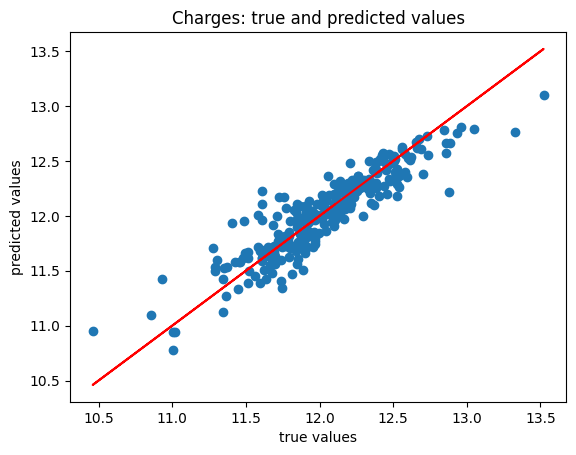

Mean absolute error of the prediction is: 0.12570372872852303
Mean squared error of the prediction is: 0.029192121871290135
Root mean squared error of the prediction is: 0.1708570217207655
Mean absolute percentage error of the prediction is: 1.0503577667817643


In [28]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
# Add a constant to the model because it's best practice
# to do so every time!
X1_test = sm.add_constant(X1_test)

# You are making predictions here
y1_preds = results.predict(X1_test)

plt.scatter(y1_test, y1_preds)
plt.plot(y1_test, y1_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y1_test, y1_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y1_test, y1_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y1_test, y1_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y1_test - y1_preds) / y1_test)) * 100))



The test set evaluation metrics are given above. For every metric, the second model achieves a better prediction performance in the test set.

Reference solution for future use: https://github.com/Thinkful-Ed/machine-learning-regression-problems/blob/master/notebooks/6.solution_making_predictions.ipynb